## life Cycle of This Deep Learning Project 
1. Define The Problem
2. Data Collection
3. Data Analysis
4. Pre-traind Model Reborta

## 1. Define The Problem 
This Project Implement Reborta a sentiment analysis model Pre-trained on twitter data our aim to accurately identifying positive, negative, and neutral sentiment within customer feedback Reborta will provide valuable insights to help hotels improve their services and overall guest satisfaction.

### Import Dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode , iplot # to work offline in jupter notebook 
init_notebook_mode(connected=True) ## to access pre built template
import plotly.graph_objects as go ## to create interactive plots 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.colors as colors
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
from collections import Counter
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

## 2. Data Collection

In [2]:
## laoding the data 
data = pd.read_csv('hotel_reviews.csv')

## showing frist rows 
data.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


## 3. Data Analysis
1. Missing Values
2. Duplicated Values
3. Data Type

In [3]:
def missing_values(df):
    nan_columns = [col for col in df.columns if df[col].isnull().sum()>0] ## name of columns
    nan_values = df[nan_columns].isnull().sum().sort_values(ascending = True) ## number of missing values 
    ratio = (df[nan_columns].isnull().mean()).sort_values(ascending = True) ## precentage of missing values 
    missing_df = pd.concat([nan_values ,np.round(ratio , 3)] , axis = 1 , keys = ['Nan Values' , 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

In [4]:
## dataset Information 
def check_dataframe(df , head = 5 , tail = 5):
    print('Shape'.center(82, '~' ))
    print('Row : {}'.format(df.shape[0]))
    print("Columns : {}".format(df.shape[1]))
    print('Type'.center(82, '~' ))
    print(data.dtypes)
    print("Missing Values".center(82 , '~' ))
    print(missing_values(df))
    print("Duplicated Values".center(82 , '~' ))
    print('Duplicated Values : {}'.format(df.duplicated().sum()) )
    

In [5]:
check_dataframe(data)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Shape~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Row : 7001
Columns : 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Type~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index                  int64
Name                  object
Area                  object
Review_Date           object
Rating_attribute      object
Rating(Out of 10)    float64
Review_Text           object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Missing Values~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
             Nan Values  Ratio
Review_Text           7  0.001
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Duplicated Values~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Duplicated Values : 0


In [6]:
## Rmoving missing values 
data.dropna(inplace=True , ignore_index=True)

In [7]:
def Check_class(data):
    nunique_df = pd.DataFrame({'Variable' : data.columns , 
                              'Classes' : [data[i].nunique() for i in data.columns]})
    nunique_df = nunique_df.sort_values('Classes' ,ascending = False )
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

In [8]:
Check_class(data)

,Variable,Classes
0,Index,6994
1,Review_Text,3902
2,Rating_attribute,1870
3,Name,570
4,Review_Date,36
5,Area,31
6,Rating(Out of 10),12


In [9]:
def get_bar_color(rating):
    # Access color list based on rating (ensure enough colors for all ratings)
    color_index = int(rating) - 1  
    return colors.DEFAULT_SCALE[color_index % len(colors.DEFAULT_SCALE)]


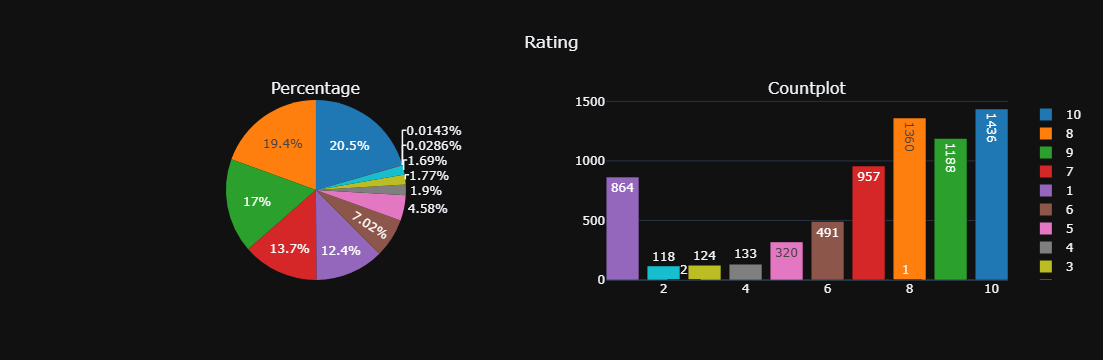

In [10]:
# divide rating features into labels and values
labels = data['Rating(Out of 10)'].value_counts().keys()
values = data['Rating(Out of 10)'].value_counts().values

# Create figure with subplots
fig = make_subplots(rows=1,
                    cols=2,
                    specs=[[{'type':'pie'}, {'type':'bar'}]] ,
                   subplot_titles =( 'Percentage', 'Countplot') 
                   )

# Add pie chart
fig.add_trace(go.Pie(labels=labels, values=values ,
                     marker = dict(colors = colors.DEFAULT_PLOTLY_COLORS)), 
              row=1,
              col=1)

# Add bar chart
fig.add_trace(go.Bar(x=labels,
                     y=values ,
                     width=0.8 , 
                    textposition='auto' ,
                    textfont=dict(size = 12) , 
                    showlegend=False , 
                    text=values ,
                    marker_color=colors.DEFAULT_PLOTLY_COLORS), row=1, col=2)
fig.update_layout(template = 'plotly_dark' , title = {'text':'Rating' ,'xanchor' : 'center' ,'yanchor':'top', 'x':0.5  , 'y':0.9})

iplot(fig)


### Insghit 
#### Overall most of feedback between 8 to 10 rating contribute to 56.9 % of all rating 

In [11]:
# number of hotels
print('Number of Hotels : {}'.format(data['Name'].nunique()))

Number of Hotels : 570


### Most Rated Hotels

In [12]:
most_rated = data[data['Rating(Out of 10)'].between(8,10)]['Name'].nunique()

intermediate = data[data['Rating(Out of 10)'].between(5,7)]['Name'].nunique()

low_rated = data[data['Rating(Out of 10)'].between(1,4)]['Name'].nunique()

In [13]:
## creat dictionray 
data_dict = {'Most Rated': [most_rated], 'Intermediate': [intermediate], 'Low Rated': [low_rated]}

# Create the DataFrame
df = pd.DataFrame(data_dict).T
# replace 0 with count
df = df.rename(columns = {0 : 'count'})

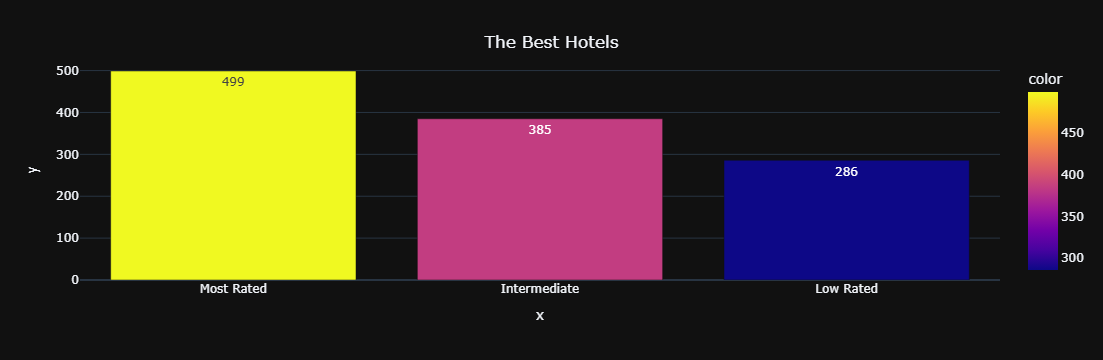

In [14]:
fig = px.bar(x = df.index,y = df['count'] , template='plotly_dark' , text_auto=True  , color = df['count'])
fig.update_layout(template = 'plotly_dark' , title = {'text':'The Best Hotels' ,'xanchor' : 'center' ,'yanchor':'top', 'x':0.5  , 'y':0.9})

iplot(fig)


### Insight 
1. Numbers Of Best Hotels are 499
2. Numbers Of Intermediate Hotels are 385
3. Numbers Of Lowest Hotels are 286


In [15]:
## create data for top 15 hotels based on average rate
top_15_hotels = data.groupby('Name' , as_index = False)['Rating(Out of 10)'].mean().sort_values(by =  'Rating(Out of 10)' ,
                                                                                                ascending = False).head(15)

top_15_hotels

,Name,Rating(Out of 10)
66,Divine India Service Apartment 3 BHK D-198 Saket,10.0
167,Hotel Airport JMD Divine 15 MINTUE IGI AIRPORT...,10.0
192,Hotel City Plaza,10.0
147,HOTEL PARK PRIDE,10.0
381,Manaya Residency,10.0
496,Super OYO Flagship The Vintage Residency Near ...,10.0
220,Hotel Golden Palace By Otaexpertz,10.0
258,Hotel Mannat,10.0
553,Westend Capital B & B,10.0
407,OYO Flagship Premium Rooms,10.0


In [16]:
## create data for lowest 15 hotels based on average rate
low_15_hotels = data.groupby('Name' , as_index = False)['Rating(Out of 10)'].mean().sort_values(by =  'Rating(Out of 10)' ,
                                                                                                ascending = True).head(15)

low_15_hotels

,Name,Rating(Out of 10)
0,"3BHK HeritageHomes Tulip, Economical yet Luxur...",1.0
294,Hotel Red Snapper Prime,1.0
51,Collection O Hotel Swisston Palace,1.0
390,OYO Flagship 74192 Vishwakarma Palace,1.0
395,OYO Flagship 80818 Hotel Metro Inn Near Gurudw...,1.0
400,OYO Flagship Hotel All Seasons,1.0
34,Bewafa Palace,1.0
401,OYO Flagship Hotel Metro Star Near Lotus Temple,1.0
405,OYO Flagship Hotel SS Palace,1.0
406,OYO Flagship Hotel Yuvraj Paalace,1.0


### Most Repeated 

In [17]:
corpus = data['Review_Text']
## remove special character
feadback = []
for i in range(len(corpus)):
    text = re.sub('[^a-zA-Z]', ' ', corpus[i]) 
    feadback.append(text)


In [18]:
## make list for stop words
stop_words = ['and' ,'the','was','is','to' , 'a' , 'this','that' , 'i','very','for','of','with','it','at' ,'but','we','all','from','my',
              'as','in','are','s' , 't','delhi' ,'hotel' , 'me','so' , 'any' , 'you' , 'had' , 'also' , 'they' , 'really' , 'our','on','have',
             'there' , 'near']

## tokeniazation and lowercase
doc = []
for sent in feadback:
    for words in sent.split():
        words = words.lower()
        doc.append(words)

In [19]:
## words after remove unimportant word
word = [word for word in doc if word not in stop_words]

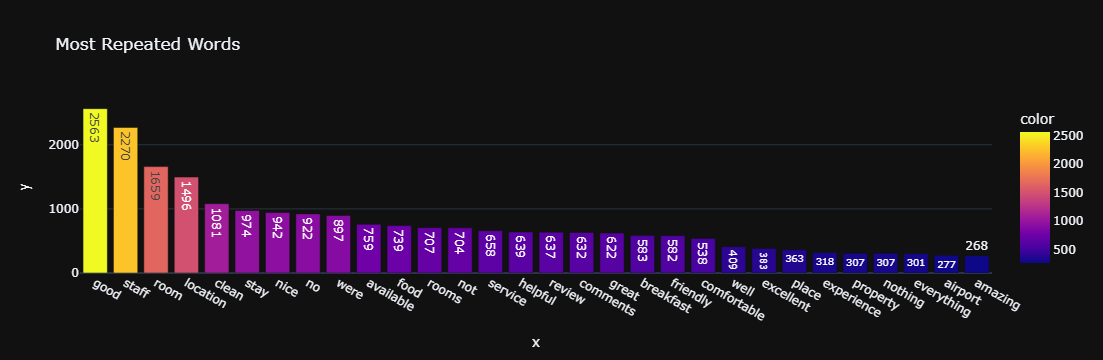

In [20]:
## Ploting The most 30 words repeated in spam message
px.bar(x = pd.DataFrame(Counter(word).most_common(30))[0] , y=pd.DataFrame(Counter(word).most_common(30))[1] ,
        template='plotly_dark' , text_auto=True  , color=pd.DataFrame(Counter(word).most_common(30))[1] , 
      title = 'Most Repeated Words')


In [21]:
## create object for word cloud 
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')


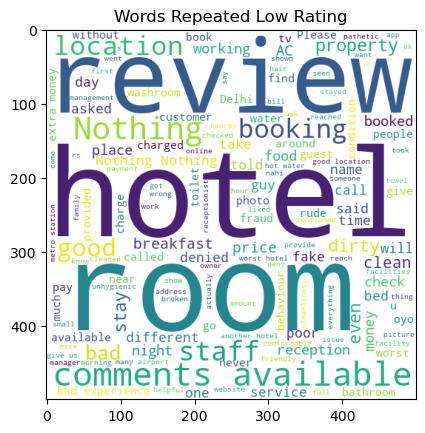

In [22]:
## Visualizing The words in lowset hotels
words_clo = wc.generate(data[data['Rating(Out of 10)'].between(1,4)]['Review_Text'].str.cat(sep = ' '))

## plotting
plt.imshow(words_clo)
plt.title('Words Repeated Low Rating')
plt.show()

## SentimentIntensityAnalyzer VADER

In [23]:
## Create object 
sia = SentimentIntensityAnalyzer()

In [24]:
## calculate polrity score 
data['polrity'] = data['Review_Text'].apply(lambda x : sia.polarity_scores(x))

In [25]:
data['Nagative'] = data['polrity'].apply(lambda x : x.get('neg'))

data['positive'] = data['polrity'].apply(lambda x : x.get('pos'))

data['Neutral'] = data['polrity'].apply(lambda x : x.get('neu'))

data['compound'] = data['polrity'].apply(lambda x : x.get('compound'))

## remove unimportant features 
del(data['polrity'])

In [26]:
## Select important features 
data_vader = data[['Name' ,'Review_Text','Rating(Out of 10)','Nagative','positive',	'Neutral',	'compound']]
data_vader.head()

,Name,Review_Text,Rating(Out of 10),Nagative,positive,Neutral,compound
0,Hotel The Pearl,Hotel the pearl is perfect place to stay in De...,9.0,0.0,0.393,0.607,0.9606
1,Hotel The Pearl,Location of the hotel is perfect. The hotel is...,9.0,0.0,0.524,0.476,0.9565
2,Hotel The Pearl,"Location, Indian food.",9.0,0.0,0.000,1.000,0.0000
3,Hotel The Pearl,The location and the hotel itself is great. Ne...,9.0,0.0,0.371,0.629,0.9423
4,Hotel The Pearl,Friendly and smiling staffs.. The reception st...,9.0,0.0,0.509,0.491,0.9713


## 4. Pre-traind Model Reborta

In [27]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm


In [28]:
pre_traind = f"cardiffnlp/twitter-roberta-base-sentiment" 

## tokenizer to convert text into numbers
tokenizer = AutoTokenizer.from_pretrained(pre_traind)

## download pre_traind model and its weights
model = TFAutoModelForSequenceClassification.from_pretrained(pre_traind)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [29]:
## create function for polarty score 
def polrity_score(text):
    ## encoded text 
    encodeed_text = tokenizer(text , return_tensors='tf')

    ## output 
    output = model(**encodeed_text)

    ## get score 
    score = output[0][0]
    ## appling sofmax
    score = softmax(score)
    score_dict = {
        'Negative' : score[0] , 
        'Neutral': score[1] , 
        'positive':score [2]
    }
    return score_dict

In [30]:
## apply reborta score on data
data['polrity_reborta'] = data['Review_Text'].apply(lambda x : polrity_score(x))

In [35]:
## make data for reborta
data_reborta = data[['Name' , 'Review_Text','Rating(Out of 10)','polrity_reborta']]

In [36]:
data_reborta.head()

,Name,Review_Text,Rating(Out of 10),polrity_reborta
0,Hotel The Pearl,Hotel the pearl is perfect place to stay in De...,9.0,"{'Negative': 0.0011113229, 'Neutral': 0.009019..."
1,Hotel The Pearl,Location of the hotel is perfect. The hotel is...,9.0,"{'Negative': 0.0014702661, 'Neutral': 0.011948..."
2,Hotel The Pearl,"Location, Indian food.",9.0,"{'Negative': 0.055216763, 'Neutral': 0.8097796..."
3,Hotel The Pearl,The location and the hotel itself is great. Ne...,9.0,"{'Negative': 0.0015844633, 'Neutral': 0.010916..."
4,Hotel The Pearl,Friendly and smiling staffs.. The reception st...,9.0,"{'Negative': 0.001373333, 'Neutral': 0.0066959..."


In [37]:
data_reborta['Nagative'] = data_reborta['polrity_reborta'].apply(lambda x : x.get('Negative'))

data_reborta['positive'] = data_reborta['polrity_reborta'].apply(lambda x : x.get('positive'))

data_reborta['Neutral'] = data_reborta['polrity_reborta'].apply(lambda x : x.get('Neutral'))


## remove unimportant features 
del(data_reborta['polrity_reborta'])
del(data['polrity_reborta'])

In [38]:
data_reborta.head()

,Name,Review_Text,Rating(Out of 10),Nagative,positive,Neutral
0,Hotel The Pearl,Hotel the pearl is perfect place to stay in De...,9.0,0.001111,0.989869,0.009019
1,Hotel The Pearl,Location of the hotel is perfect. The hotel is...,9.0,0.001470,0.986581,0.011948
2,Hotel The Pearl,"Location, Indian food.",9.0,0.055217,0.135004,0.809780
3,Hotel The Pearl,The location and the hotel itself is great. Ne...,9.0,0.001584,0.987499,0.010917
4,Hotel The Pearl,Friendly and smiling staffs.. The reception st...,9.0,0.001373,0.991931,0.006696


In [39]:
## create features for sentiment pos neg neu
from transformers import pipeline
sent_pip = pipeline('sentiment-analysis' , model = model , tokenizer = tokenizer)

In [40]:
sent_pip(data['Review_Text'][0])[0]['label']

'LABEL_2'

In [42]:
## apply reborta score on data
data_reborta['Sentiment_reborta'] = data['Review_Text'].apply(lambda x : sent_pip(x))

In [43]:
data_reborta.head()

,Name,Review_Text,Rating(Out of 10),Nagative,positive,Neutral,Sentiment_reborta
0,Hotel The Pearl,Hotel the pearl is perfect place to stay in De...,9.0,0.001111,0.989869,0.009019,"[{'label': 'LABEL_2', 'score': 0.9898692369461..."
1,Hotel The Pearl,Location of the hotel is perfect. The hotel is...,9.0,0.001470,0.986581,0.011948,"[{'label': 'LABEL_2', 'score': 0.9865814447402..."
2,Hotel The Pearl,"Location, Indian food.",9.0,0.055217,0.135004,0.809780,"[{'label': 'LABEL_1', 'score': 0.8097796440124..."
3,Hotel The Pearl,The location and the hotel itself is great. Ne...,9.0,0.001584,0.987499,0.010917,"[{'label': 'LABEL_2', 'score': 0.9874990582466..."
4,Hotel The Pearl,Friendly and smiling staffs.. The reception st...,9.0,0.001373,0.991931,0.006696,"[{'label': 'LABEL_2', 'score': 0.9919307827949..."


In [44]:
## extract the number of label to convet to pos neg or neu
data_reborta['Sentiment'] = data_reborta['Sentiment_reborta'].apply(lambda x : x[0]['label'])

In [45]:
data_reborta.head()

,Name,Review_Text,Rating(Out of 10),Nagative,positive,Neutral,Sentiment_reborta,Sentiment
0,Hotel The Pearl,Hotel the pearl is perfect place to stay in De...,9.0,0.001111,0.989869,0.009019,"[{'label': 'LABEL_2', 'score': 0.9898692369461...",LABEL_2
1,Hotel The Pearl,Location of the hotel is perfect. The hotel is...,9.0,0.001470,0.986581,0.011948,"[{'label': 'LABEL_2', 'score': 0.9865814447402...",LABEL_2
2,Hotel The Pearl,"Location, Indian food.",9.0,0.055217,0.135004,0.809780,"[{'label': 'LABEL_1', 'score': 0.8097796440124...",LABEL_1
3,Hotel The Pearl,The location and the hotel itself is great. Ne...,9.0,0.001584,0.987499,0.010917,"[{'label': 'LABEL_2', 'score': 0.9874990582466...",LABEL_2
4,Hotel The Pearl,Friendly and smiling staffs.. The reception st...,9.0,0.001373,0.991931,0.006696,"[{'label': 'LABEL_2', 'score': 0.9919307827949...",LABEL_2


In [46]:
## Create func to replace label with pos neg or neu
def changelabel(text):
    if text == 'LABEL_2' :
        return 'Positive'
    elif text == 'LABEL_1':
        return 'Neutral'
    else :
        return 'Negative'
    return text

In [47]:
## delete Sentiment_reborta 
del(data_reborta['Sentiment_reborta'])

In [48]:
## replacing labels with sentiment
data_reborta['Sentiment'] = data_reborta['Sentiment'].apply(changelabel)

In [49]:
## distribution of labels 
data_reborta['Sentiment'].value_counts()

Sentiment
Positive    4312
Neutral     1901
Negative     781
Name: count, dtype: int64

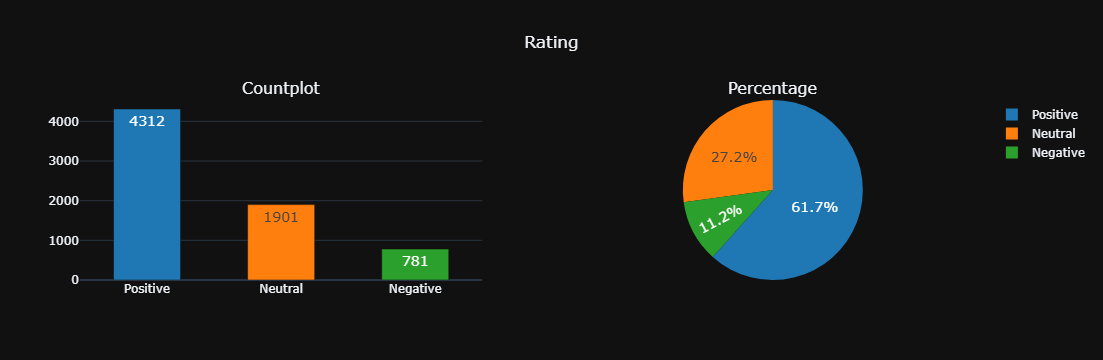

In [50]:
## comparing labels regarding precentage and count 
# divide rating features into labels and values
labels = data_reborta['Sentiment'].value_counts().keys()
values = data_reborta['Sentiment'].value_counts().values

## create subplots
fig = make_subplots(rows= 1 ,
                   cols= 2 , 
                   subplot_titles=('Countplot'  , 'Percentage') ,
                   specs=[[{'type':'bar'} , {'type':'pie'}]])

fig.add_trace(go.Bar(x = labels , 
                    y = values   ,
                    textfont=dict(size = 14) , 
                    width= 0.5 ,
                     text=values ,
                    textposition='auto' ,
                    showlegend=False , 
                    marker_color= colors.DEFAULT_PLOTLY_COLORS) , row=1 , col=1)



fig.add_trace(go.Pie(labels= labels , values= values,
                    textfont=dict(size = 14) , 
                    textposition='auto' ,
                    showlegend=True , 
                    marker= dict(colors = colors.DEFAULT_PLOTLY_COLORS)) ,row=1 , col=2)
fig.update_layout(template = 'plotly_dark' , title = {'text':'Rating' ,'xanchor' : 'center' ,'yanchor':'top', 'x':0.5  , 'y':0.9})

iplot(fig)

### Insight 
1. Number of Positive feedback 4312 Contribute to 61.7% of all feedback
2. Number of Neutral feedback 1901 Contribute to 27.2% of all feedback
3. Number of Negative feedback 781 Contribute to 11.2% of all feedback

#### Most Hotel Get Positive Feedback

In [51]:
## filter  out neg and neu feedback
pos_feedback = data_reborta[data_reborta['Sentiment'] == 'Positive']
pos_feedback.head()

,Name,Review_Text,Rating(Out of 10),Nagative,positive,Neutral,Sentiment
0,Hotel The Pearl,Hotel the pearl is perfect place to stay in De...,9.0,0.001111,0.989869,0.009019,Positive
1,Hotel The Pearl,Location of the hotel is perfect. The hotel is...,9.0,0.001470,0.986581,0.011948,Positive
3,Hotel The Pearl,The location and the hotel itself is great. Ne...,9.0,0.001584,0.987499,0.010917,Positive
4,Hotel The Pearl,Friendly and smiling staffs.. The reception st...,9.0,0.001373,0.991931,0.006696,Positive
5,Hotel The Pearl,The location was really perfect.. we really en...,9.0,0.001483,0.991113,0.007405,Positive


In [52]:
best_hotel = pos_feedback.groupby('Name' , as_index = False)['Sentiment'].size().sort_values(by = 'size' ,
                                                                                         ascending = False).head(5)

best_hotel

,Name,size
161,Hotel Comforte Stay Indian Guest allowed only,36
442,The Neem,36
266,Hotel Shanti Villa,32
197,Hotel International Inn - Near Delhi Airport,32
386,Raj Mahal Inn,32


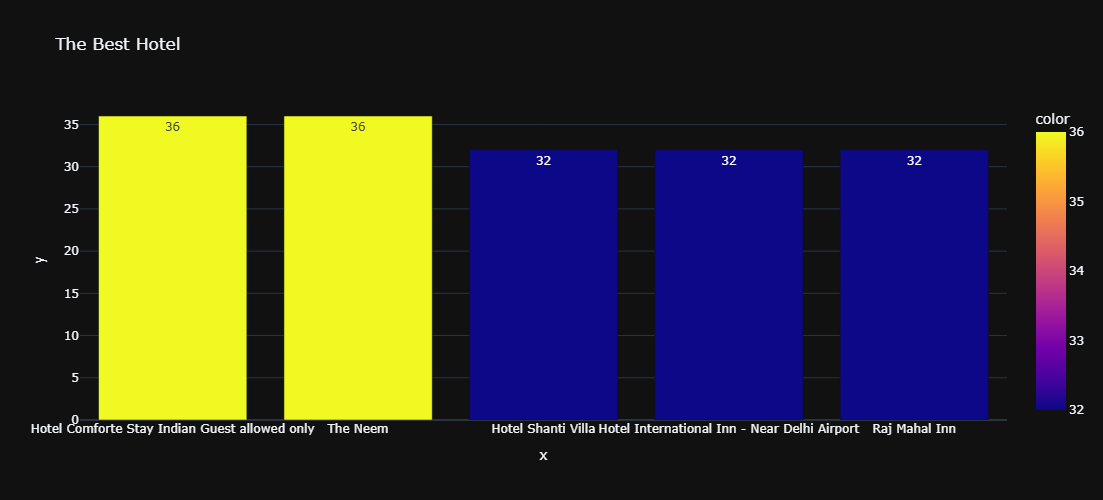

In [53]:
## ploting 
px.bar(x= best_hotel['Name'] , y = best_hotel['size'] , color = best_hotel['size'] ,
       template='plotly_dark' , text_auto=True ,
       title= 'The Best Hotel' , width=700, height=500)

#### Most Hotel Get Positive Feedback

In [59]:
## filter  out neg and neu feedback
neg_feedback = data_reborta[data_reborta['Sentiment'] == 'Negative']
neg_feedback.head()

,Name,Review_Text,Rating(Out of 10),Nagative,positive,Neutral,Sentiment
41,"Holiday Inn New Delhi Mayur Vihar Noida, an IH...",· Parking and room both are not good,7.0,0.970183,0.003470,0.026347,Negative
60,Novotel New Delhi Aerocity- International Airport,The music from the bar was very very very loud...,7.0,0.949787,0.005772,0.044441,Negative
68,Novotel New Delhi Aerocity- International Airport,· The wifi went out for a few hours in the ev...,7.0,0.936698,0.005028,0.058274,Negative
101,"Holiday Inn New Delhi International Airport, a...","· The ac in room was not setting properly, l ...",7.0,0.809780,0.011681,0.178539,Negative
103,"Holiday Inn New Delhi International Airport, a...",Security guard has misbehaved with us he is th...,9.0,0.952755,0.001855,0.045389,Negative


In [60]:
neg_feedback_plot = neg_feedback.groupby('Name' , as_index = False)['Sentiment'].size().sort_values(by = 'size' ,
                                                                                         ascending = False).head(5)

neg_feedback_plot

,Name,size
221,OYO Townhouse 023 CR Park Near Lotus Temple,20
82,Hotel Aura,11
2,Aero villa,10
114,Hotel Jageer Palace,10
244,Roomshala 099 Hotel Jyoti Deluxe - Karol Bagh,10


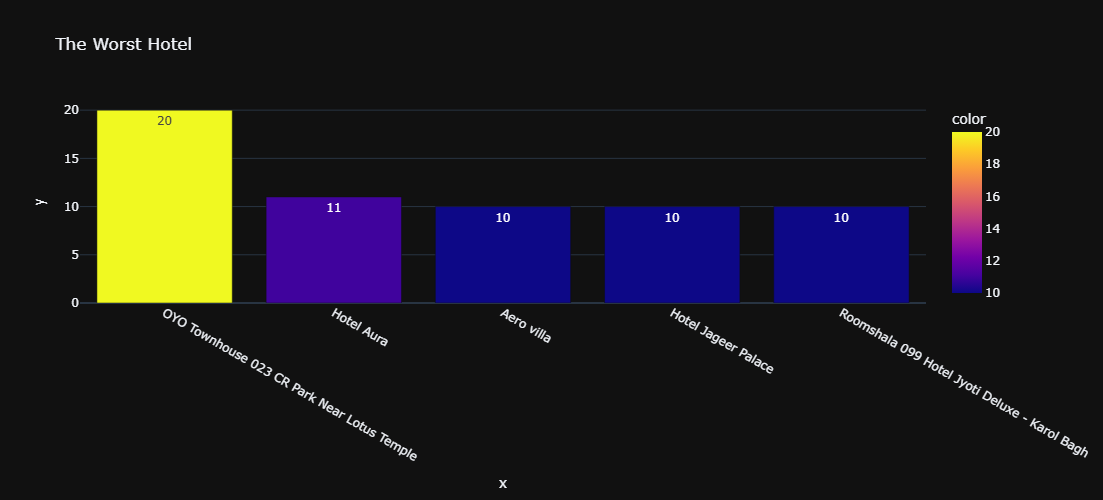

In [74]:
## ploting 
px.bar(x= neg_feedback_plot['Name'] , y = neg_feedback_plot['size'] , color = neg_feedback_plot['size'] ,
       template='plotly_dark' , text_auto=True ,
       title= 'The Worst Hotel' , width=700, height=500)

In [73]:
## take random sample of negative feed back 
neg_feedback[['Name' , 'Review_Text','Sentiment']][['Name' , 'Review_Text']].sample(1).values

array([['Hotel Natraj Yes Please',
        'Hotel is ok but the description of the room on the website is far from accurate: my single deluxe room had not electric kettle, no wardrobe, nothing apart from a bed, two chairs, a very little table, two very little soaps, two small sample of shampoo, one glass  and that\'s it. I would not call the room "deluxe"...']],
      dtype=object)

### Insight 
#### we can solve this problem by giving The right description about room and so on 